In [112]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [113]:
dataset=tf.keras.datasets.cifar100
(X_train,Y_train),(X_test,Y_test)=dataset.load_data()
(X_train_deep,Y_train_deep),(X_test_deep,Y_test_deep)=dataset.load_data()

[42]


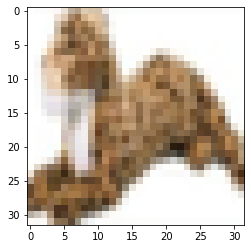

In [114]:
plt.imshow(X_train[28])
print(Y_train[28])

In [115]:
print(X_train.shape)
print(Y_train.shape)
print(X_train.shape[1]*X_train.shape[2]*X_train.shape[3])

(50000, 32, 32, 3)
(50000, 1)
3072


In [116]:
X_train=X_train.reshape(50000,3072)
print(X_train.shape)

(50000, 3072)


In [117]:
print(np.unique(Y_train))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [118]:
X_train,X_valid,Y_train,Y_valid=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

In [119]:
model=tf.keras.models.Sequential([
    Dense(64,input_dim=3072,activation='relu'),#input_layer
    Dense(32,activation='relu'),
    Dense(100,activation='softmax')#output_layer

])

In [120]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics='accuracy')

In [121]:
model.fit(X_train,Y_train,validation_data=(X_valid,Y_valid),epochs=10)

Epoch 1/10
1250/1250 [==============================] - 6s 4ms/step - loss: 5.2958 - accuracy: 0.0094 - val_loss: 4.6325 - val_accuracy: 0.0085
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 4.6060 - accuracy: 0.0086 - val_loss: 4.6205 - val_accuracy: 0.0088
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 4.6059 - accuracy: 0.0100 - val_loss: 4.6200 - val_accuracy: 0.0083
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 4.7023 - accuracy: 0.0099 - val_loss: 4.6067 - val_accuracy: 0.0082
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 4.6058 - accuracy: 0.0100 - val_loss: 4.6069 - val_accuracy: 0.0082
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 4.6058 - accuracy: 0.0092 - val_loss: 4.6068 - val_accuracy: 0.0082
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 4.6057 - accuracy: 0.0094 - val_loss: 4.6069 - val_accuracy:

In [122]:
print(X_test.shape)
print(Y_test.shape)
X_test=X_test.reshape(10000,3072)
print(X_test.shape)

(10000, 32, 32, 3)
(10000, 1)
(10000, 3072)


In [123]:
accuracy = model.evaluate(X_test,Y_test)

print("accuracy =", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 4.6054 - accuracy: 0.0100
accuracy = [4.605376720428467, 0.009999999776482582]


In [125]:
X_train_deep,X_test_deep = X_train_deep/255.0, X_test_deep/255.0

deep_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32,32,3)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(100, activation='softmax')
])

deep_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

deep_model.fit(X_train_deep,Y_train_deep, epochs=10)
deep_model.evaluate(X_test_deep, Y_test_deep)


Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 4.4599 - accuracy: 0.0339
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 4.1730 - accuracy: 0.0655
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 4.0735 - accuracy: 0.0809
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 4.0117 - accuracy: 0.0893
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 3.9609 - accuracy: 0.0967
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 3.9176 - accuracy: 0.1043
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 3.8822 - accuracy: 0.1083
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 3.8560 - accuracy: 0.1134
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 3.8299 - accuracy: 0.1180
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 3.7503 

[3.75032901763916, 0.13449999690055847]